## Importing necessary Libraries

In [1]:
# Dataframe manupilation and analysis libraries
import pandas as pd
import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Loading the DataFrame

In [2]:
df = pd.read_excel('car_data.xlsx')

In [3]:
# To view first 5 rows
df.head()

,POLICY_ID,PRODUCT_CODE,INCEPTION_DATE,EXPIRY_DATE,CATEGORY,CHANNEL,SUB_CHANNEL,BUSINESS_TYPE,VEHICLE_CC,VEHICLE_AGE,...,MODELCLASSIFICATION,FUELTYPE,BREAKIN_INSURANCE_FLAG,STATE,CITY,AIDV,IDV,Nill_Dep_Flag,NCB_Flag,Total_Claims
0,ID1,VPC,2018-10-29,2019-10-28,Comprehensive,RETAIL AGENCY,AGENCY,Roll-Over,2393,2,...,OTHERS,DIESEL,NO,MAHARASHTRA,MUMBAI,1434960.0,1434960.0,YES,NO,1
1,ID2,VPC,2018-05-08,2018-05-31,Comprehensive,BRANCH BUSINESS,BROKER,Renewal,796,5,...,OTHERS,PETROL,NO,TAMILNADU,CHENNAI,170000.0,170000.0,NO,YES,0
2,ID3,VPC,2018-05-14,2019-05-13,Comprehensive,BRANCH BUSINESS,BROKER-OEM,New,1461,0,...,OTHERS,DIESEL,NO,MAHARASHTRA,PUNE,1261452.0,1261452.0,NO,NO,0
3,ID4,VPC,2018-06-01,2019-05-31,Comprehensive,BRANCH BUSINESS,BROKER-OEM,Renewal,2523,6,...,OTHERS,DIESEL,NO,KERALA,ERNAKULAM,350000.0,350000.0,NO,YES,0
4,ID5,VPC,2018-06-01,2019-05-31,Comprehensive,BRANCH BUSINESS,BROKER,Renewal,1197,8,...,OTHERS,PETROL,NO,TAMILNADU,CHENNAI,213216.0,213216.0,NO,NO,0


In [4]:
# To view last 5 rows
df.tail()

,POLICY_ID,PRODUCT_CODE,INCEPTION_DATE,EXPIRY_DATE,CATEGORY,CHANNEL,SUB_CHANNEL,BUSINESS_TYPE,VEHICLE_CC,VEHICLE_AGE,...,MODELCLASSIFICATION,FUELTYPE,BREAKIN_INSURANCE_FLAG,STATE,CITY,AIDV,IDV,Nill_Dep_Flag,NCB_Flag,Total_Claims
818182,ID818183,VPC,2018-11-30,2019-11-29,Comprehensive,RETAIL AGENCY,AGENCY,New,6498,1,...,HighEnd,PETROL,NO,AP&TELANGANA,HYDERABAD,45828000.0,45828000.0,YES,YES,0
818183,ID818184,VPC,2018-04-07,2019-04-06,Comprehensive,BRANCH BUSINESS,DEALER,New,3996,0,...,HighEnd,PETROL,NO,MAHARASHTRA,MUMBAI,29341492.0,29341492.0,YES,NO,0
818184,ID818185,VPC,2018-06-13,2019-06-12,Comprehensive,AFFINITY,BANK-SCB,Roll-Over,6592,2,...,HighEnd,PETROL,YES,TAMILNADU,CHENNAI,37800000.0,37800000.0,YES,YES,0
818185,ID818186,VPC,2018-04-17,2019-04-16,Comprehensive,BRANCH AGENCY,DSA,Renewal,4367,3,...,HighEnd,DIESEL,NO,TAMILNADU,CHENNAI,20115000.0,20115000.0,YES,YES,0
818186,ID818187,VPB,2018-09-24,2019-09-23,Comprehensive,RETAIL AGENCY,AGENCY,New,3996,0,...,HighEnd,PETROL,NO,PONDICHERRY,PONDICHERRY,46489464.0,46489464.0,YES,NO,0


### Understanding the Data

In [5]:
df.columns

Index(['POLICY_ID', 'PRODUCT_CODE', 'INCEPTION_DATE', 'EXPIRY_DATE',
       'CATEGORY', 'CHANNEL', 'SUB_CHANNEL', 'BUSINESS_TYPE', 'VEHICLE_CC',
       'VEHICLE_AGE', 'MAKE', 'MODELGROUP', 'MODELCLASSIFICATION', 'FUELTYPE',
       'BREAKIN_INSURANCE_FLAG', 'STATE', 'CITY', 'AIDV', 'IDV',
       'Nill_Dep_Flag', 'NCB_Flag', 'Total_Claims'],
      dtype='object')

In [6]:
df.shape

(818187, 22)

## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818187 entries, 0 to 818186
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   POLICY_ID               818187 non-null  object        
 1   PRODUCT_CODE            818187 non-null  object        
 2   INCEPTION_DATE          818187 non-null  datetime64[ns]
 3   EXPIRY_DATE             818187 non-null  datetime64[ns]
 4   CATEGORY                818187 non-null  object        
 5   CHANNEL                 818187 non-null  object        
 6   SUB_CHANNEL             818187 non-null  object        
 7   BUSINESS_TYPE           818187 non-null  object        
 8   VEHICLE_CC              818187 non-null  int64         
 9   VEHICLE_AGE             818187 non-null  int64         
 10  MAKE                    818187 non-null  object        
 11  MODELGROUP              818187 non-null  object        
 12  MODELCLASSIFICATION     818187

Analysis:

- There are more than 8 lakh records(rows) in the dataset.
- There are 22 columns/features in the dataset

In [8]:
df.isnull().sum()

POLICY_ID                 0
PRODUCT_CODE              0
INCEPTION_DATE            0
EXPIRY_DATE               0
CATEGORY                  0
CHANNEL                   0
SUB_CHANNEL               0
BUSINESS_TYPE             0
VEHICLE_CC                0
VEHICLE_AGE               0
MAKE                      0
MODELGROUP                0
MODELCLASSIFICATION       0
FUELTYPE                  0
BREAKIN_INSURANCE_FLAG    0
STATE                     0
CITY                      0
AIDV                      0
IDV                       0
Nill_Dep_Flag             0
NCB_Flag                  0
Total_Claims              0
dtype: int64

Analysis:

- There is no null values in the dataset.
- There is no need for missing value imputation

## Descriptive Analysis

In [9]:
df.describe()

,VEHICLE_CC,VEHICLE_AGE,AIDV,IDV,Total_Claims
count,818187.000000,818187.000000,8.181870e+05,8.181870e+05,818187.000000
mean,1219.019874,3.678690,4.529324e+05,4.528427e+05,0.263238
std,368.269055,3.468776,5.108498e+05,5.116962e+05,0.581261
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,998.000000,1.000000,2.134350e+05,2.133151e+05,0.000000
50%,1197.000000,3.000000,3.561160e+05,3.560120e+05,0.000000
75%,1248.000000,6.000000,5.827500e+05,5.825380e+05,0.000000
max,6592.000000,32.000000,7.099248e+07,7.099248e+07,13.000000


Analysis

- Descriptive statistics works only for continuous data.

In [10]:
df.skew()

C:\Users\kishmmm\AppData\Local\Temp\ipykernel_19612\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


VEHICLE_CC       2.228773
VEHICLE_AGE      1.038272
AIDV            17.467074
IDV             17.650669
Total_Claims     2.712585
dtype: float64

Analysis:
    
   - Here all the values are above 1 which means they all are highly positively skewed,(i.e. mean is greater than median)
   - Due to the presence of the outliers the data gets skewed. 

In [11]:
df.kurt()

C:\Users\kishmmm\AppData\Local\Temp\ipykernel_19612\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


VEHICLE_CC         8.188326
VEHICLE_AGE        0.660465
AIDV            1050.273889
IDV             1059.572854
Total_Claims      10.672108
dtype: float64

Analysis

- Here vehicle_age is only having value in the range of zero.
- Other attributes having value more than 1, which suggests that the data points are more peaked or concentrated around the mean compared to normal distribution.

### Outliers Detection technique

<AxesSubplot:>

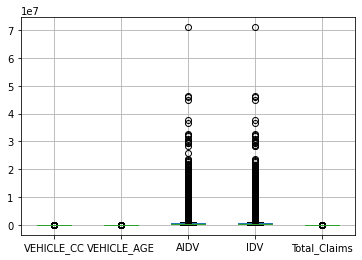

In [12]:
df.boxplot(vert=True)

Analysis

- It shows how the data is distributed and shows the presence of any outliers.

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLE_CC'>

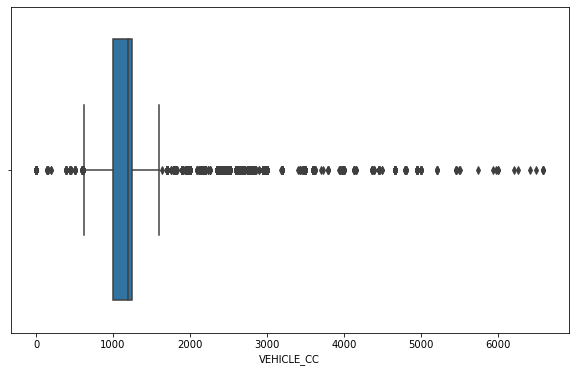

In [13]:
plt.figure(figsize = (10,6))      
sns.boxplot(df['VEHICLE_CC'])
# this is the boxplot technique to detect outliers 

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLE_AGE'>

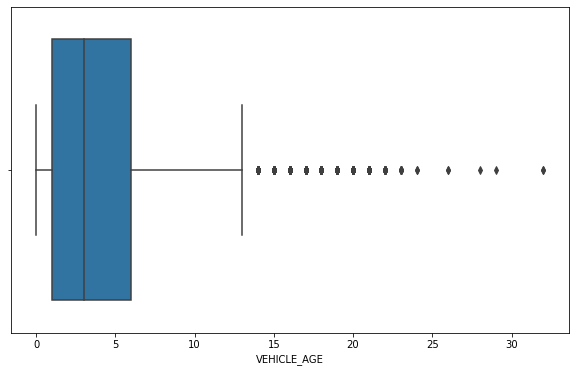

In [14]:
plt.figure(figsize = (10,6))      
sns.boxplot(df['VEHICLE_AGE'])

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IDV'>

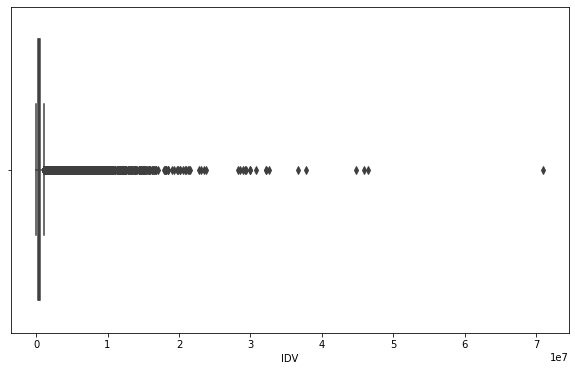

In [15]:
plt.figure(figsize = (10,6))      
sns.boxplot(df['IDV'])

## Data Visualization

### Pie chart

- It is a circular chart which is divided into slices and is used to view and compare categorical column.

In [16]:
df['FUELTYPE'].unique()

array(['DIESEL', 'PETROL', 'INBUILT', 'ELECTRIC'], dtype=object)

In [17]:
df['FUELTYPE'].value_counts()

PETROL      516541
DIESEL      281452
INBUILT      20047
ELECTRIC       147
Name: FUELTYPE, dtype: int64

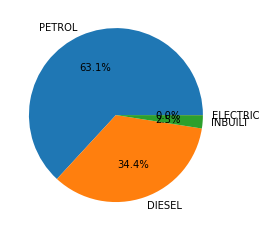

In [18]:
plt.pie(df['FUELTYPE'].value_counts(),labels=['PETROL','DIESEL','INBUILT','ELECTRIC'],autopct='%.1f%%')
plt.show()

### Bar chart

- a bar graph is used to visualize a categorical column with more than 3 unique values

In [19]:
df['STATE'].value_counts()

GUJARAT               123295
TAMILNADU             108704
KARNATAKA              95856
AP&TELANGANA           91548
MAHARASHTRA            85484
KERALA                 54171
UTTAR PRADESH          39774
WEST BENGAL            37996
HARYANA                28985
DELHI                  21709
RAJASTHAN              20237
JHARKHAND              19723
MADHYA PRADESH         16436
UTTARAKHAND            14190
ORISSA                 12089
PUNJAB                 11436
HIMACHAL PRADESH       10955
BIHAR                   5327
CHATTISGARH             5129
JAMMU KASHMIR           4048
PONDICHERRY             3319
ASSAM                   3117
GOA                     2194
CHANDIGARH              1591
SIKKIM                   235
DADRA NAGAR HAVELI       203
DAMAN   DIU              127
MEGHALAYA                113
MIZORAM                  108
TRIPURA                   27
ARUNACHAL PRADESH         21
ANDAMAN NICOBAR           19
NAGALAND                  10
MANIPUR                   10
LAKSHWADWEEP  

In [20]:
state_value_count = df['STATE'].value_counts()

<BarContainer object of 35 artists>

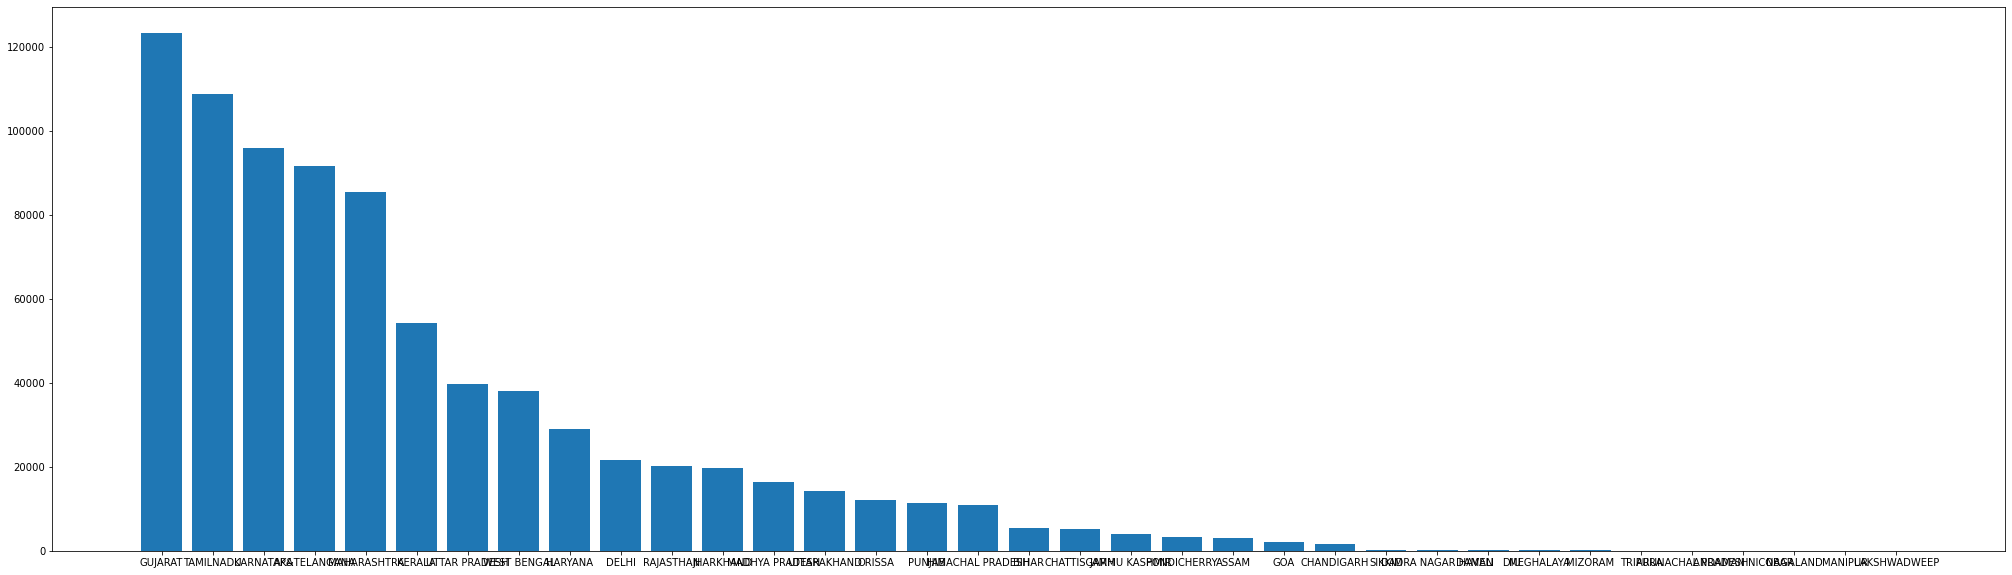

In [21]:
plt.figure(figsize=(35,10))  
plt.bar(state_value_count.index,state_value_count.values) 

Viewing Top 10 states

<BarContainer object of 10 artists>

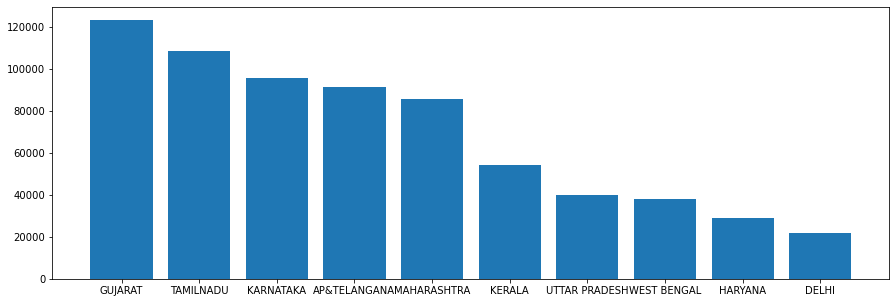

In [22]:
plt.figure(figsize=(15,5))  
plt.bar(state_value_count[:10].index,state_value_count[:10].values) 

#### Correlation table

<AxesSubplot:>

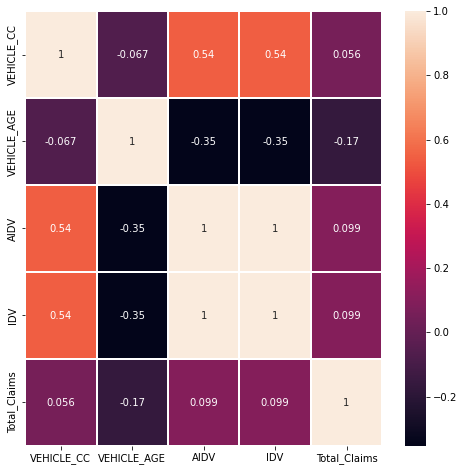

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, linewidth = 0.2)

## Feature Selection

- It is the process of selecting the relevant( or eliminating unwanted) features from the dataset, so that we can improve our model performance

In [24]:
col_to_drop = ['POLICY_ID','PRODUCT_CODE','INCEPTION_DATE','EXPIRY_DATE','CATEGORY','CHANNEL','SUB_CHANNEL','MAKE','MODELGROUP','STATE','CITY','Nill_Dep_Flag','NCB_Flag']

In [25]:
DF = df.drop(col_to_drop,axis=1)

In [26]:
DF.columns

Index(['BUSINESS_TYPE', 'VEHICLE_CC', 'VEHICLE_AGE', 'MODELCLASSIFICATION',
       'FUELTYPE', 'BREAKIN_INSURANCE_FLAG', 'AIDV', 'IDV', 'Total_Claims'],
      dtype='object')

## Data Preprocessing

### Encoding Techniques

- Here we are converting categorical variables into numerical format.

#### Label Encoding

- It is used for ordinal data where some kind of sequence exists. 

In [27]:
labelencoder = LabelEncoder()
DF['BREAKIN_INSURANCE_FLAG'] = labelencoder.fit_transform(df['BREAKIN_INSURANCE_FLAG'])
DF['MODELCLASSIFICATION'] = labelencoder.fit_transform(df['MODELCLASSIFICATION'])

#### One Hot Encoding

- It is used for nominal data where it treat each category as independent one which does not follow any sequence or order.

In [28]:
DF['BUSINESS_TYPE'] = DF['BUSINESS_TYPE'].map({'New':1,'Renewal':2,'Roll-Over':3})

In [29]:
DF = pd.get_dummies(DF,columns = ['BUSINESS_TYPE'])

In [30]:
DF['FUELTYPE'] = DF['FUELTYPE'].map({'DIESEL':1,'ELECTRIC':2,'INBUILT':3,'PETROL':4})

In [31]:
DF = pd.get_dummies(DF,columns = ['FUELTYPE'])

In [32]:
DF.head()

,VEHICLE_CC,VEHICLE_AGE,MODELCLASSIFICATION,BREAKIN_INSURANCE_FLAG,AIDV,IDV,Total_Claims,BUSINESS_TYPE_1,BUSINESS_TYPE_2,BUSINESS_TYPE_3,FUELTYPE_1,FUELTYPE_2,FUELTYPE_3,FUELTYPE_4
0,2393,2,1,0,1434960.0,1434960.0,1,0,0,1,1,0,0,0
1,796,5,1,0,170000.0,170000.0,0,0,1,0,0,0,0,1
2,1461,0,1,0,1261452.0,1261452.0,0,1,0,0,1,0,0,0
3,2523,6,1,0,350000.0,350000.0,0,0,1,0,1,0,0,0
4,1197,8,1,0,213216.0,213216.0,0,0,1,0,0,0,0,1


### Outliers Treatment

In [33]:
def replace_outlier(mydf,col):
    Q1 = mydf[col].quantile(0.25)  
    Q2 = mydf[col].quantile(0.50)
    Q3 = mydf[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR   
    mydf.loc[(mydf[col] < LW),col] = Q1     
    mydf.loc[(mydf[col] > UW),col] = Q3     
    return mydf

In [34]:
DF = replace_outlier(DF,'VEHICLE_CC')

In [35]:
DF = replace_outlier(DF,'VEHICLE_AGE')

In [36]:
DF = replace_outlier(DF,'IDV')

In [37]:
DF = replace_outlier(DF,'AIDV')

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLE_CC'>

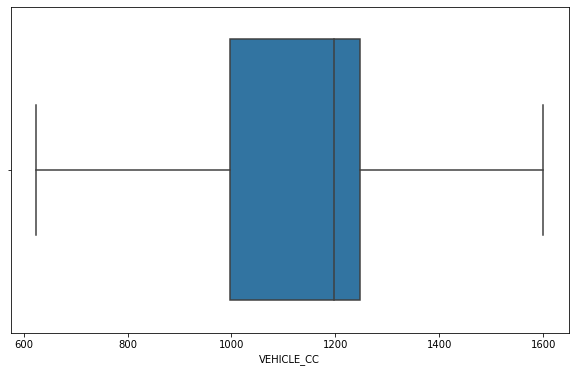

In [38]:
plt.figure(figsize = (10,6))      
sns.boxplot(DF['VEHICLE_CC'])

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLE_AGE'>

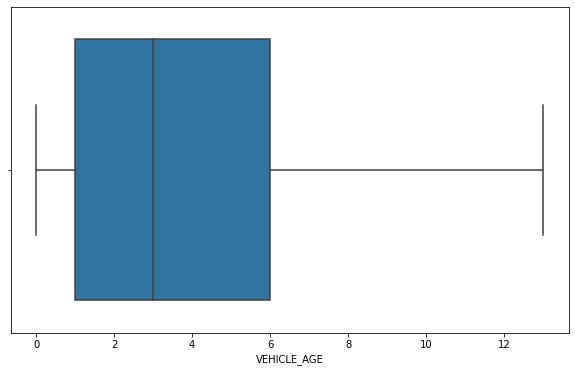

In [39]:
plt.figure(figsize = (10,6))      
sns.boxplot(DF['VEHICLE_AGE'])

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IDV'>

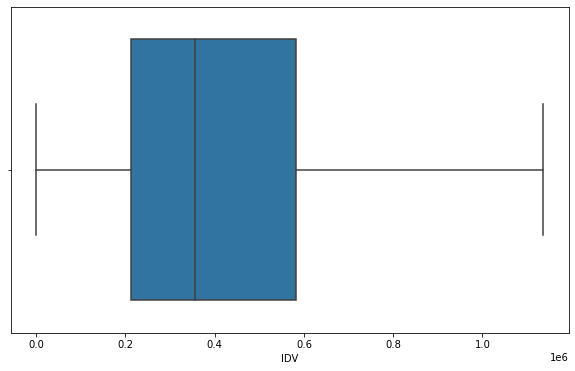

In [40]:
plt.figure(figsize = (10,6))      
sns.boxplot(DF['IDV'])

C:\Users\kishmmm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AIDV'>

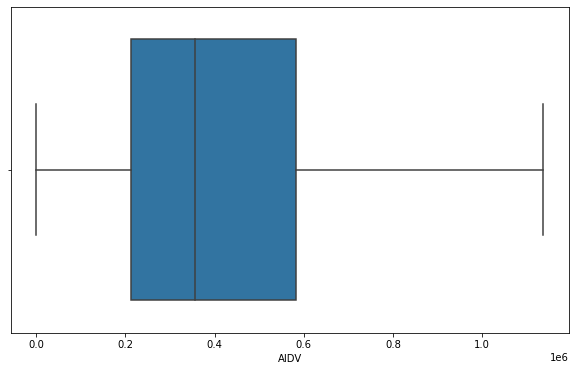

In [41]:
plt.figure(figsize = (10,6))      
sns.boxplot(DF['AIDV'])

### Train - Test split

In [42]:
x = DF.drop(['Total_Claims'],axis = 1)
y = DF['Total_Claims']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 1)

## Model Building :

1. Model object creation
2. Model fitting
3. Model prediction
4. Model Evaluation

In [44]:
model = DecisionTreeRegressor()

In [45]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
y_pred = model.predict(x_test)

#### Model Evaluation

In [47]:
r2_score(y_test,y_pred)

-0.40658628069433345

In [48]:
def model_builder (x,y,model_name):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
    model = model_name()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    result = r2_score(y_test,y_pred)
    return result

In [50]:
model_builder(x,y,RandomForestRegressor)

-0.13154450427508668

In [51]:
model_builder(x,y,LinearRegression)

0.03867284611358046

In [52]:
model_builder(x,y,KNeighborsRegressor)

-0.12787893010984552

In [ ]:
model_builder(x,y,XGBRegressor)

In [ ]:
model_builder(x,y,GradientBoostingRegressor)

Analysis

- From the above models Linear Regression, XG boost and Grandient boost gives positive value and other models are in negative range.